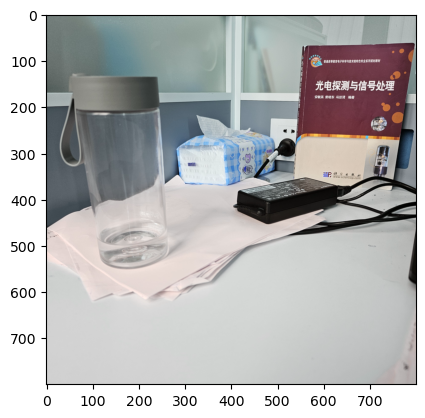

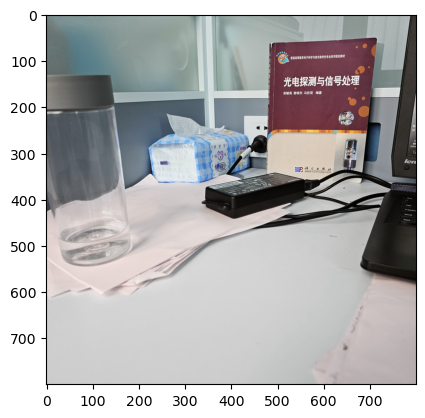

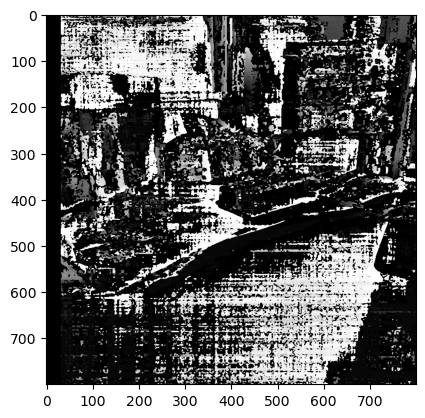

In [10]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

imgL = cv2.imread('./left/left.png')
imgR = cv2.imread('./right/right.png')

# disparity range tuning
window_size = 3
min_disp = 0
#num_disp = 256 - min_disp

stereo = cv2.StereoSGBM_create(
    minDisparity=0,#最小视差值
    numDisparities=32, # 视差范围，16的整数倍max_disp has to be dividable by 16 f. E. HH 192, 256
    blockSize=3,#匹配块大小
    P1=8* 3 * window_size ** 2,#控制视差平滑度
    # wsize default 3; 5; 7 for SGBM reduced size image; 15 for SGBM full size image (1300px and above); 5 Works nicely
    P2=32 * 3 * window_size ** 2,#控制视差平滑度，P2大于P1
    disp12MaxDiff=2,#左右一致性检查允许的最大视差差异
    uniquenessRatio=16,#唯一性检查时的阈值
    speckleWindowSize=3,#消除噪声斑点时的窗口大小
    speckleRange=2,#消除噪声斑点时的最大视差变化
    preFilterCap=100,#预处理截断梯度值的上限
    mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY
)
disparity = stereo.compute(imgL, imgR).astype(np.float32) / 16.0
plt.imshow(imgL, 'gray')
plt.show()
plt.imshow(imgR, 'gray')
plt.show()
plt.imshow(disparity, 'gray')
plt.show()